In [73]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [65]:
debt_data = pd.read_csv("statewise_debt_aggregation_Pre1790.csv")

,State key,Loan Office Certificates Specie Value,State Liquidated Debt Dollars,Pierce Certificates Value
0,PA,3.778570e+06,2.257929e+06,1147498.52
1,MA,2.387481e+06,4.578235e+05,2217598.90
2,CT,1.275499e+06,1.354322e+05,1137988.73
3,NY,9.220057e+05,3.649823e+06,774934.83
4,NJ,6.512044e+05,1.768007e+06,513348.62
5,MD,4.047050e+05,NaN,550014.80
6,NH,3.001711e+05,1.382644e+04,380285.90
7,VA,2.352496e+05,NaN,653914.72
8,DE,6.638712e+04,1.363059e+05,130868.22
9,RI,NaN,1.830005e+05,81210.76


In [69]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

US_map = geopandas.read_file("gz_2010_us_040_00_500k.json")
US_map.replace({"NAME": us_state_to_abbrev}, inplace=True)
df_merged = US_map.merge(debt_data, left_on="NAME", right_on="State key")
df_merged

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,State key,Loan Office Certificates Specie Value,State Liquidated Debt Dollars,Pierce Certificates Value
0,0400000US25,25,MA,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",MA,2.387481e+06,4.578235e+05,2217598.90
1,0400000US34,34,NJ,,7354.220,"POLYGON ((-75.52684 39.65571, -75.52634 39.656...",NJ,6.512044e+05,1.768007e+06,513348.62
2,0400000US36,36,NY,,47126.399,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...",NY,9.220057e+05,3.649823e+06,774934.83
3,0400000US37,37,NC,,48617.905,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...",NC,NaN,NaN,329382.65
4,0400000US42,42,PA,,44742.703,"POLYGON ((-75.41504 39.80179, -75.42804 39.809...",PA,3.778570e+06,2.257929e+06,1147498.52
5,0400000US44,44,RI,,1033.814,"MULTIPOLYGON (((-71.28157 41.64821, -71.27817 ...",RI,NaN,1.830005e+05,81210.76
6,0400000US24,24,MD,,9707.241,"MULTIPOLYGON (((-76.07147 38.20350, -76.04879 ...",MD,4.047050e+05,NaN,550014.80
7,0400000US09,09,CT,,4842.355,"MULTIPOLYGON (((-71.85957 41.32240, -71.86823 ...",CT,1.275499e+06,1.354322e+05,1137988.73
8,0400000US10,10,DE,,1948.543,"MULTIPOLYGON (((-75.55945 39.62981, -75.55910 ...",DE,6.638712e+04,1.363059e+05,130868.22
9,0400000US13,13,GA,,57513.485,"POLYGON ((-81.44412 30.70971, -81.44872 30.709...",GA,NaN,NaN,93226.85


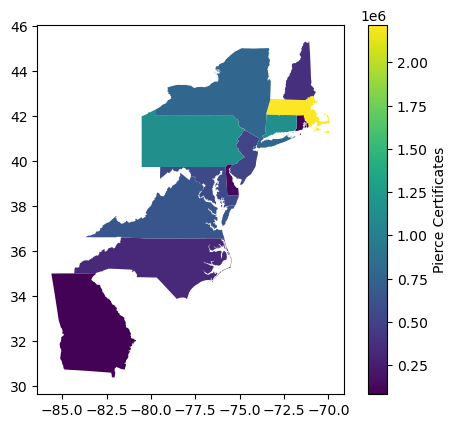

In [78]:
fig, ax = plt.subplots(1, 1)
fig = df_merged.plot(column = 'Pierce Certificates Value', #Assign numerical data column
               ax = ax,       
               legend = True, #Decide to show legend or not
               legend_kwds = {'label': "Pierce Certificates"}) #Name the legend
plt.show()